## Markov Chains

author: Jacob Schreiber <br>
contact: jmschreiber91@gmail.com

Markov Chains are a simple model based on conditional probability, where a sequence is modelled as the product of conditional probabilities. A n-th order Markov chain looks back n emissions to base its conditional probability on. For example, a 3rd order Markov chain models $P(X_{t} | X_{t-1}, X_{t-2}, X_{t-3})$.

However, a full Markov model needs to model the first observations, and the first n-1 observations. The first observation can't really be modelled well using $P(X_{t} | X_{t-1}, X_{t-2}, X_{t-3})$, but can be modelled by $P(X_{t})$. The second observation has to be modelled by $P(X_{t} | X_{t-1} )$. This means that these distributions have to be passed into the Markov chain as well. 

We can initialize a Markov chain easily enough by passing in a list of the distributions.

In [1]:
%matplotlib inline
import time
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import itertools

from pomegranate import *

random.seed(0)
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

# %load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

UsageError: Line magic function `%watermark` not found.


In [3]:
from pomegranate import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kirill/.conda/envs/nir/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
d1 = DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})
d2 = ConditionalProbabilityTable([['A', 'A', 0.10],
                                ['A', 'C', 0.50],
                                ['A', 'G', 0.30],
                                ['A', 'T', 0.10],
                                ['C', 'A', 0.10],
                                ['C', 'C', 0.40],
                                ['C', 'T', 0.40],
                                ['C', 'G', 0.10],
                                ['G', 'A', 0.05],
                                ['G', 'C', 0.45],
                                ['G', 'G', 0.45],
                                ['G', 'T', 0.05],
                                ['T', 'A', 0.20],
                                ['T', 'C', 0.30],
                                ['T', 'G', 0.30],
                                ['T', 'T', 0.20]], [d1])

clf = MarkovChain([d1, d2])

In [5]:
clf.distributions

[{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.1,
             "C" :0.4,
             "G" :0.4,
             "T" :0.1
         }
     ],
     "frozen" :false
 }, {
     "class" : "Distribution",
     "name" : "ConditionalProbabilityTable",
     "table" : [
         [
             "A",
             "A",
             "0.10000000000000002"
         ],
         [
             "A",
             "C",
             "0.5"
         ],
         [
             "A",
             "G",
             "0.3"
         ],
         [
             "A",
             "T",
             "0.10000000000000002"
         ],
         [
             "C",
             "A",
             "0.10000000000000002"
         ],
         [
             "C",
             "C",
             "0.4"
         ],
         [
             "C",
             "T",
             "0.4"
         ],
         [
             "C",
             "G",
      

Markov chains have log probability, fit, summarize, and from summaries methods implemented. They do not have classification capabilities by themselves, but when combined with a Naive Bayes classifier can be used to do discrimination between multiple models (see the Naive Bayes tutorial notebook).

Lets see the log probability of some data.

In [6]:
clf.log_probability( list('CAGCATCAGTT') ) 

-19.142227399034006

In [7]:
clf.log_probability( list('C') )

-0.916290731874155

In [8]:
clf.log_probability( list('CACATCACGACTAATGATAAT') )

-38.55615991599665

In [9]:
train = []
for i in map( list, ('ATATATTTTTTTTTAATTATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATAT',
                    'ATATATTTTTTTTTAATTATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATATAT')):
    train+=[i]

In [10]:
train = np.array(train).reshape(-1,2)
print(train.shape)

(94, 2)


In [11]:
clf.fit(train)
print (clf.distributions[1])

A	A	0.023809523809523808
A	C	0.0
A	G	0.0
A	T	0.9761904761904762
C	A	0.25
C	C	0.25
C	T	0.25
C	G	0.25
G	A	0.25
G	C	0.25
G	G	0.25
G	T	0.25
T	A	0.0
T	C	0.0
T	G	0.0
T	T	1.0


We can fit the model to sequences which we pass in, and as expected, get better performance on sequences which we train on. 

In [12]:
# clf.fit( map( list, ('CAGCATCAGT', 'C', 'ATATAGAGATAAGCT', 'GCGCAAGT', 'GCATTGC', 'CACATCACGACTAATGATAAT') ) )
print (clf.log_probability( list('CAGCATCAGT') )) 
print (clf.log_probability( list('C') ))
print (clf.log_probability( list('CACATCACGACTAATGATAAT') ))

-inf
-inf
-inf


In [13]:
print (clf.distributions[0])

{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.8936170212765957,
            "C" :0.0,
            "G" :0.0,
            "T" :0.10638297872340426
        }
    ],
    "frozen" :false
}


In [14]:
print (clf.distributions[1])

A	A	0.023809523809523808
A	C	0.0
A	G	0.0
A	T	0.9761904761904762
C	A	0.25
C	C	0.25
C	T	0.25
C	G	0.25
G	A	0.25
G	C	0.25
G	G	0.25
G	T	0.25
T	A	0.0
T	C	0.0
T	G	0.0
T	T	1.0


In [15]:
p = 0.98
d1 = DiscreteDistribution({'A': 0.1 ,'B': 0,'C':0.99})
d2 = ConditionalProbabilityTable([['A', 'A', p],
                                  ['A', 'B', 1-p],
                                  ['B', 'B', 0.8],
                                  ['B', 'C', 0.2],
                                  ['B', 'A', 0.01],
                                  ['C', 'B', 0.02],
                                  ['C', 'C', 0.98]],[d1])

d3 = ConditionalProbabilityTable([['C', 'C', 'A', 0.999]], [d1, d2])

clf = MarkovChain([d1, d2, d3])
clf.distributions[2]

{
    "class" : "Distribution",
    "name" : "ConditionalProbabilityTable",
    "table" : [
        [
            "C",
            "C",
            "A",
            "0.999"
        ]
    ],
    "dtypes" : [
        "str",
        "str",
        "str",
        "float"
    ],
    "parents" : [
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "A" : 0.1,
                    "B" : 0,
                    "C" : 0.99
                }
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "ConditionalProbabilityTable",
            "table" : [
                [
                    "A",
                    "A",
                    "0.98"
                ],
                [
                    "A",
                    "B",
                    "0.02000000000000002"
                ],
       

In [16]:
a = clf.sample(100)
#print(a)
plt.plot(a)
plt.plot(a,'.')

IndexError: index 0 is out of bounds for axis 0 with size 0

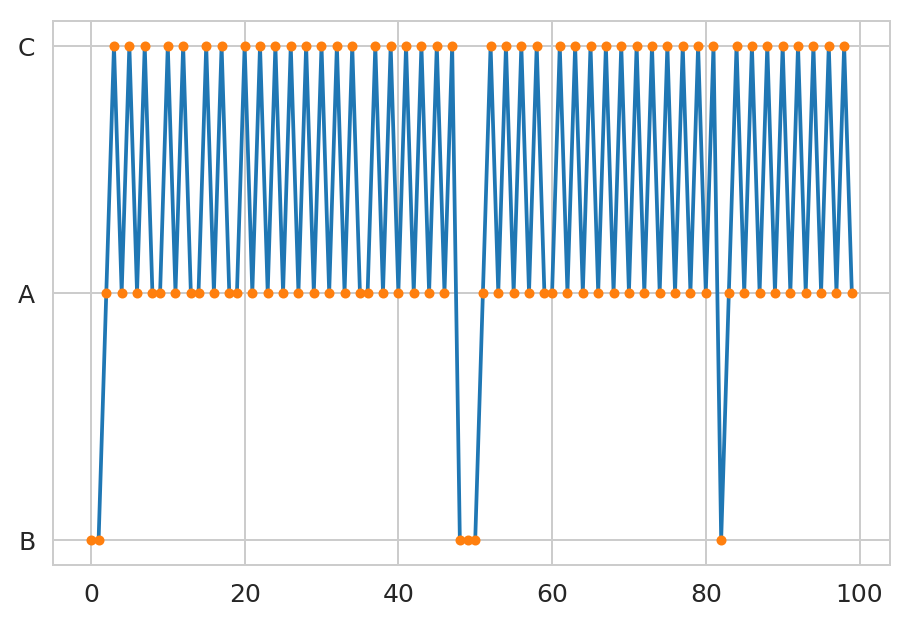

In [17]:
from pomegranate import *
d1 = DiscreteDistribution({'A': 0.25, 'B': 0.70, 'C':0.05})
d2 = ConditionalProbabilityTable([['A', 'A', 0.1],
                                  ['A', 'B', 0.0],
                                  ['A', 'C', 0.9],
                                  ['B', 'A', 0.6],
                                  ['B', 'B', 0.4],
                                  ['B', 'C', 0.1],
                                  ['C', 'A', 0.9],
                                  ['C', 'B', 0.1],
                                  ['C', 'C', 0.0],
                                  ], [d1])
# d3 = ConditionalProbabilityTable([['A', 'A', 'C', 0.4],
#                                       ['A', 'A', 'B', 0.6],
#                                       ['A', 'B', 'A', 0.8],
#                                       ['A', 'B', 'B', 0.2],
#                                       ['B', 'A', 'A', 0.9],
#                                       ['B', 'A', 'B', 0.1],
#                                       ['B', 'B', 'A', 0.2],
#                                       ['B', 'B', 'B', 0.8]], [d1, d2])
model = MarkovChain([d1, d2])
z = model.sample(100)
fig = plt.figure(dpi = 180)
plt.plot(z)
plt.plot(z,'.')

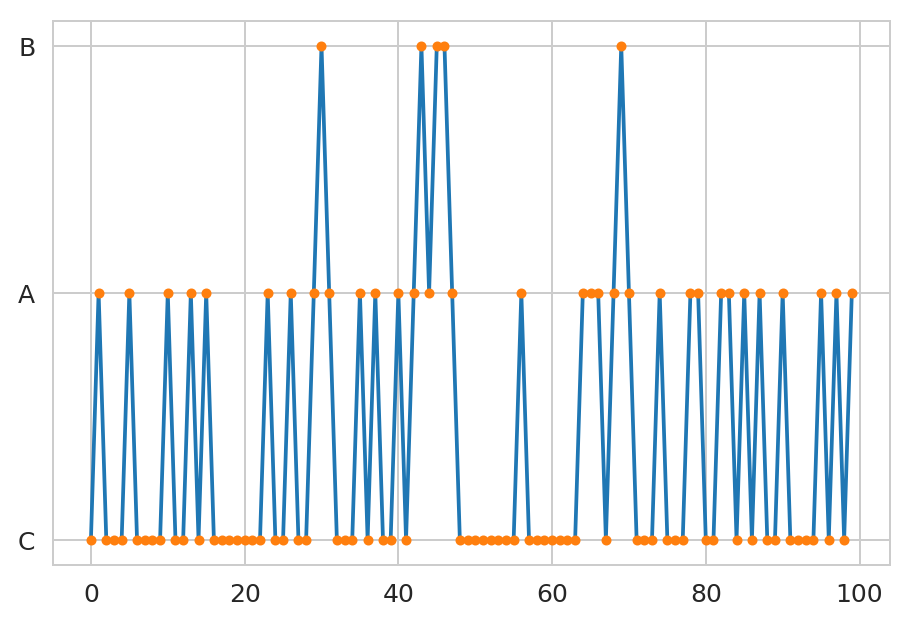

In [20]:
from pomegranate import *
d1 = DiscreteDistribution({'A': 0.1, 'B': 0.2,'C':0.7})
d2 = ConditionalProbabilityTable([['A', 'A', 0.1],
                                  ['C', 'A', 0.5],
                                  ['C', 'B', 0.0],
                                  ['C', 'C', 0.5],
                                      ['A', 'C', 0.9],
                                      ['A', 'B', 0.1],
                                      ['B', 'A', 0.6],
                                      ['B', 'B', 0.4]], [d1])

d3 = ConditionalProbabilityTable([['A', 'A', 'A', 0.01],
                                  ['A', 'A', 'B', 0.99]], [d1, d2])

# d3 = ConditionalProbabilityTable([], [d1, d2])
# model = MarkovChain([d1, d2, d3])
model = MarkovChain([d1, d2])
z = model.sample(100)
fig = plt.figure(dpi = 180)
plt.plot(z)
plt.plot(z,'.')